In [1]:
from tester_gpt import Tester

In [2]:
tester = Tester(
    verbose=True,
    pair="BTCUSDT",
    difficulty="MEDIUM",
    use_fee=True,
    fee_maker=0.0004,
    fee_taker=0.0002,
    system="NETTING"
)

In [5]:
start = ["2023-10-01", "2023-10-01", "2023-08-01", "2023-12-10", "2023-11-01", "2024-01-27 23:47:00", "2022-01-01", "2022-01-02"]
end = ["2023-11-19", "2023-10-20", "2023-09-01", "2024-01-10", "2024-01-30", "2024-02-07 05:01:00", "2024-05-15", "2022-02-03"]
num = 0
tester.test_strategy(
    interval_of_candles="1h",
    start_date_utc=start[num],
    end_date_utc=end[num],
    initial_quote=10000,
    initial_leverage=5
)

Trying to load info from directory...
Trying to download info from API...
Data loaded.
---------------------------------------------------------------------------
Testing strategy | BTCUSDT
---------------------------------------------------------------------------
2022-01-05 21:00:00 | Buying 962.7 quote for 43757.6, leverage 5
2022-01-21 12:00:00 | Buying 1462.4 quote for 38484.7, leverage 5
2022-01-24 11:00:00 | Buying 465.8 quote for 33270.5, leverage 5
2022-02-02 21:00:00 | Buying 483.2 quote for 37167.6, leverage 5
2022-02-03 00:00:00 |  Selling (closing) 3207.8 quote for 36870.8 (PnL w cl/fee: -166.93)
---------------------------------------------------------------------------
+++ CLOSING FINAL POSITION +++
net performance (%) = -1.68
number of positions opened = 1
times liquidated = 0
number of good orders = 0 (0.0%)
number of bad orders = 1 (100.0%)
Amount spent on fee = 1.9911716833222322 (0.0% of initial balance)
--------------------------------------------------------------

9831.71695867784

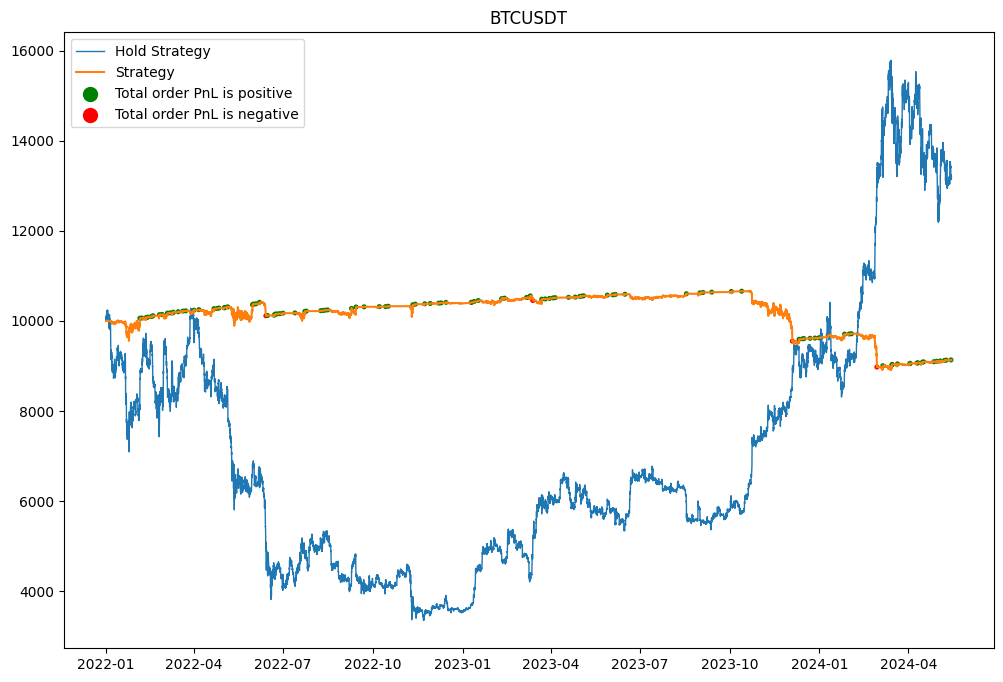

In [4]:
tester.plot_data(show_pos=False, cols=["Hold Strategy"])